In [339]:
from skimage import io as skio
import os
from skimage import io

filename = os.path.join('image1.jpg')
img = io.imread(filename)
# url = 'http://i.stack.imgur.com/SYxmp.jpg'
# img = skio.imread(url)

In [340]:
print("shape of image: {}".format(img.shape))
print("dtype of image: {}".format(img.dtype))

w, h, c = img.shape
print('width:  ', w)
print('height: ', h)


shape of image: (356, 486, 3)
dtype of image: uint8
width:   356
height:  486


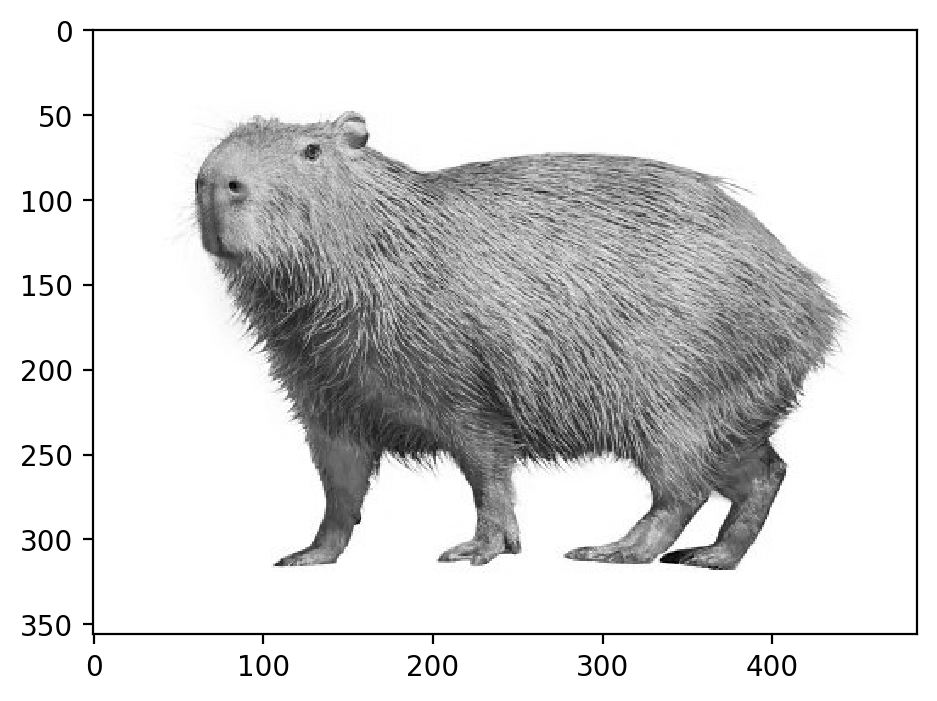

In [341]:
import cv2
img = cv2.imread('image1.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img)

In [342]:
from skimage import filters
sobel = filters.sobel(img)

In [343]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['figure.dpi'] = 200

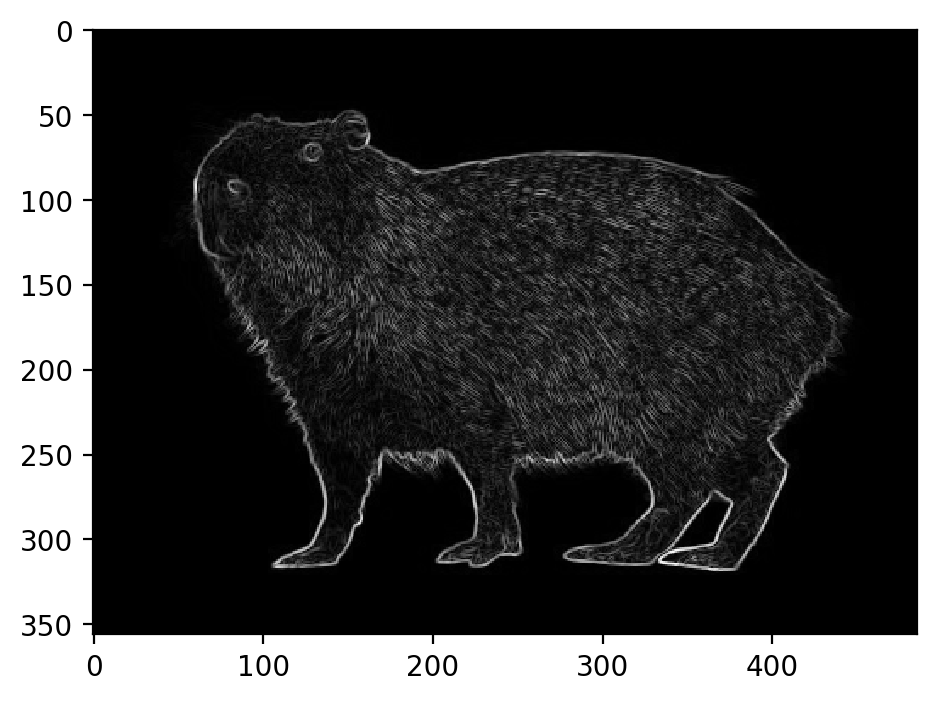

In [344]:
plt.imshow(sobel)

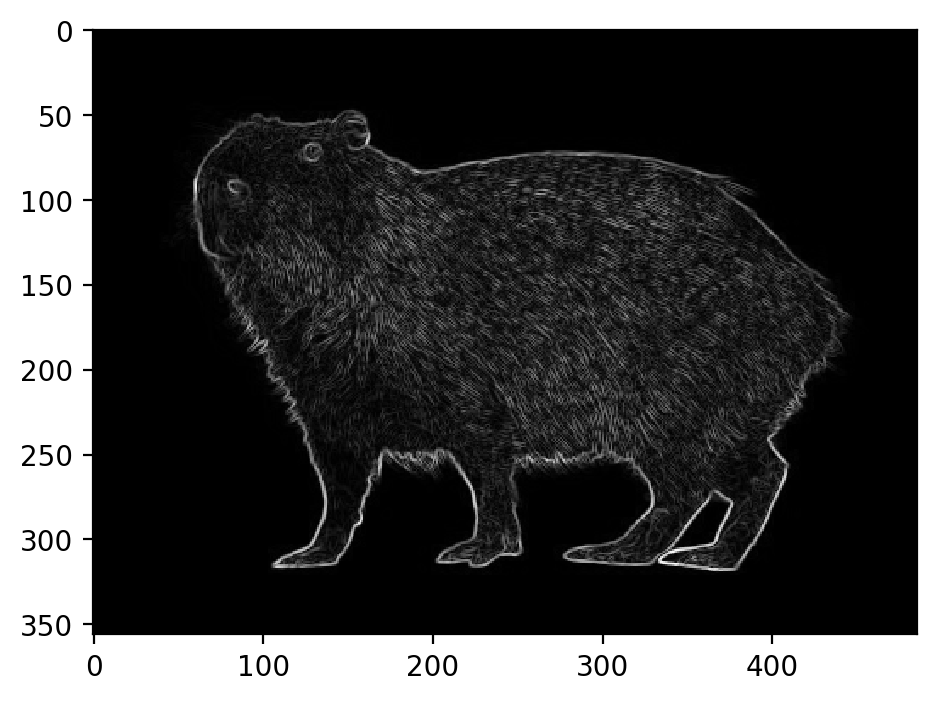

In [345]:
blurred = filters.gaussian(sobel, sigma=0.1)
plt.imshow(blurred)

In [346]:
import numpy as np
# light_spots = np.array((img > 245).nonzero()).T
light_spots = np.array((img > 100).nonzero()).T

In [347]:
light_spots.shape


(155850, 2)

Text(0.5, 1.0, 'light spots in image')

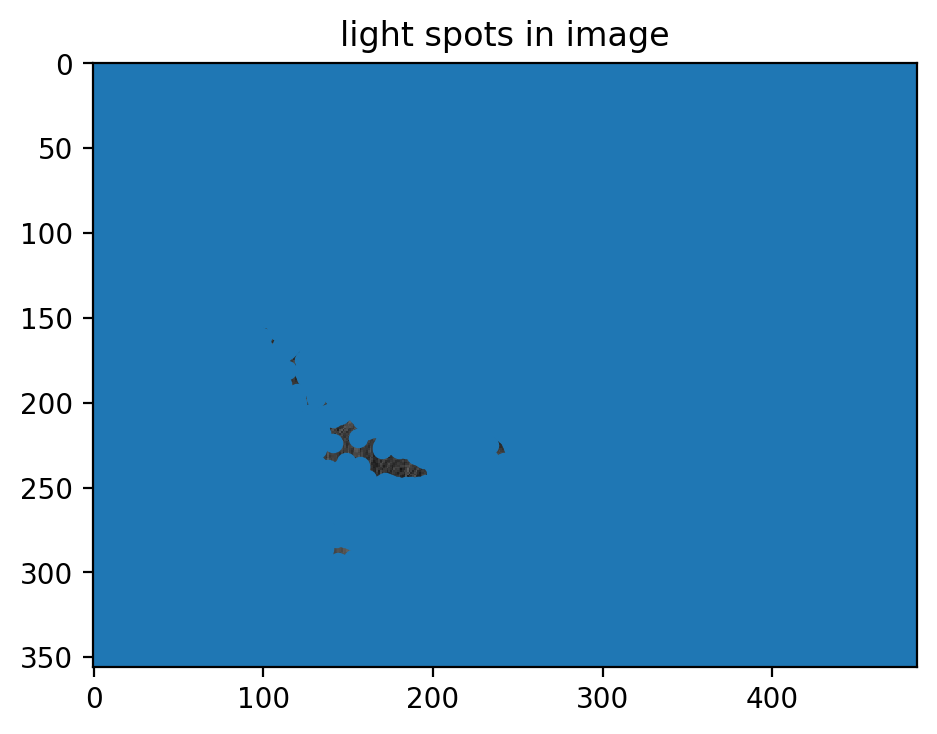

In [348]:
plt.plot(light_spots[:, 1], light_spots[:, 0], 'o')
plt.imshow(img)
plt.title('light spots in image')

In [349]:
dark_spots = np.array((img < 3).nonzero()).T
dark_spots.shape

(4, 2)

Text(0.5, 1.0, 'dark spots in image')

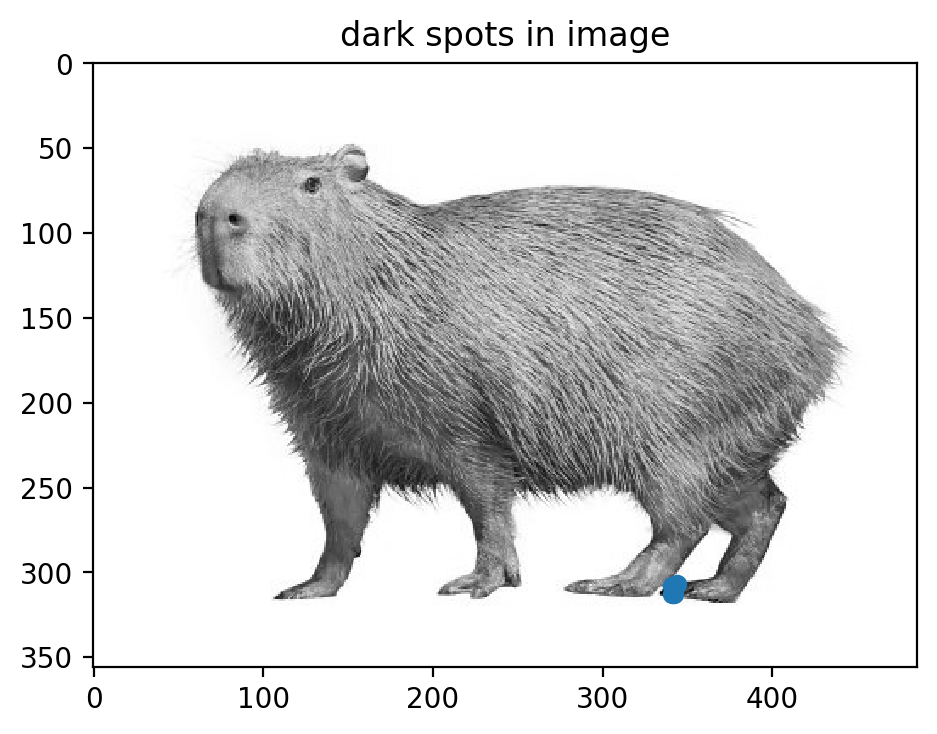

In [350]:
plt.plot(dark_spots[:, 1], dark_spots[:, 0], 'o')
plt.imshow(img)
plt.title('dark spots in image')

In [351]:
from scipy import ndimage as ndi
bool_mask = np.zeros(img.shape, dtype=np.bool)
bool_mask[tuple(light_spots.T)] = True
bool_mask[tuple(dark_spots.T)] = True
seed_mask, num_seeds = ndi.label(bool_mask)
print(num_seeds)

717


C:\Users\olypa\AppData\Local\Temp\ipykernel_748\3589254115.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  bool_mask = np.zeros(img.shape, dtype=np.bool)


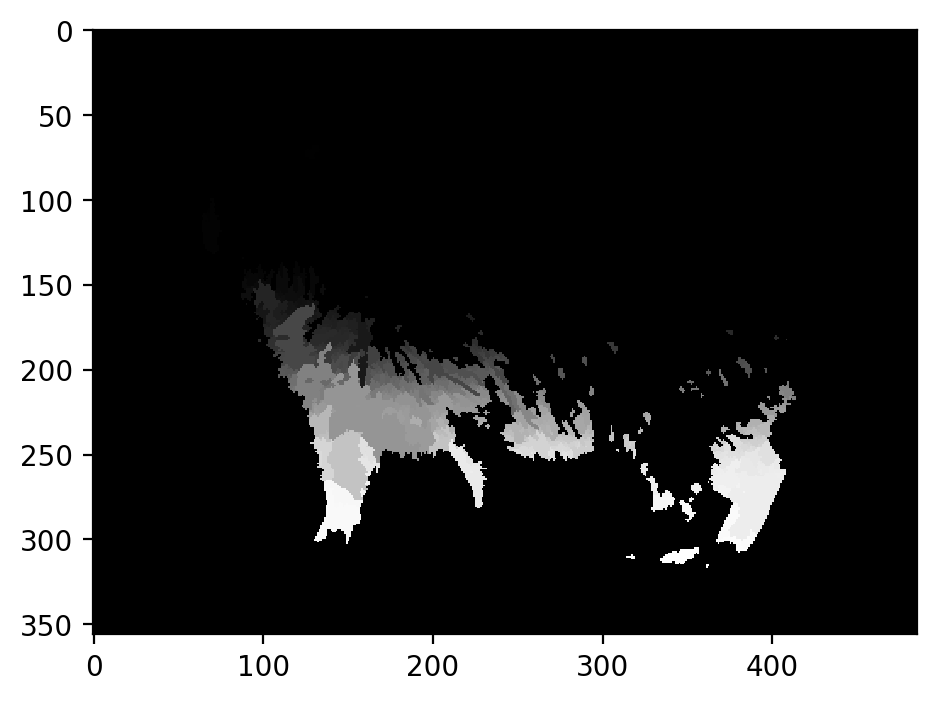

In [352]:
from skimage.segmentation import watershed
ws = watershed(blurred, seed_mask)
plt.imshow(ws)

In [353]:
background = max(set(ws.ravel()), key=lambda g: np.sum(ws == g))
background

1

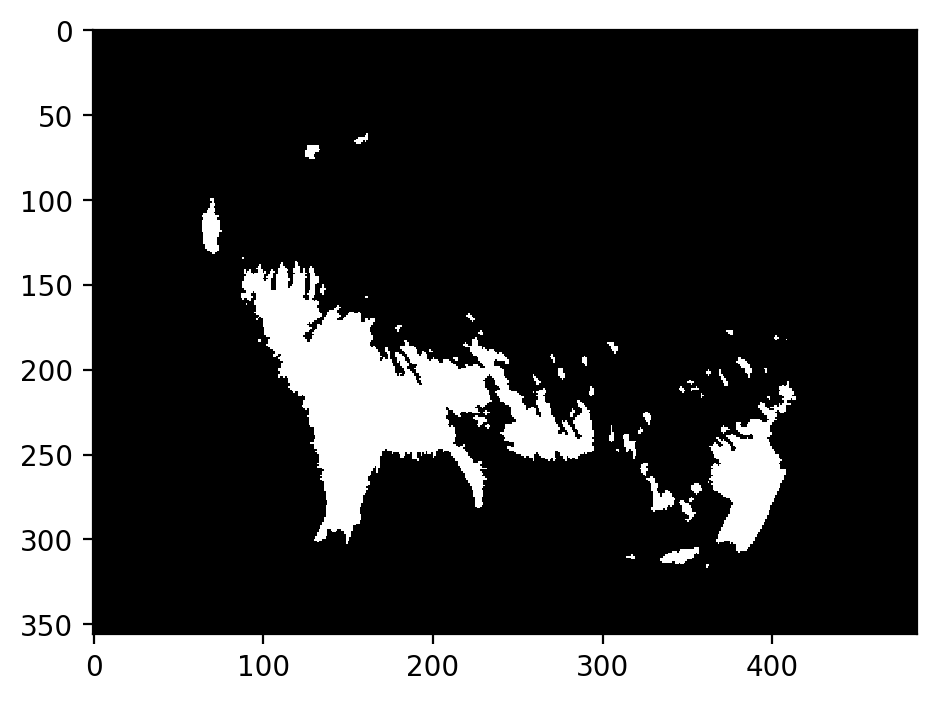

In [354]:
background_mask = (ws == background)
plt.imshow(~background_mask)

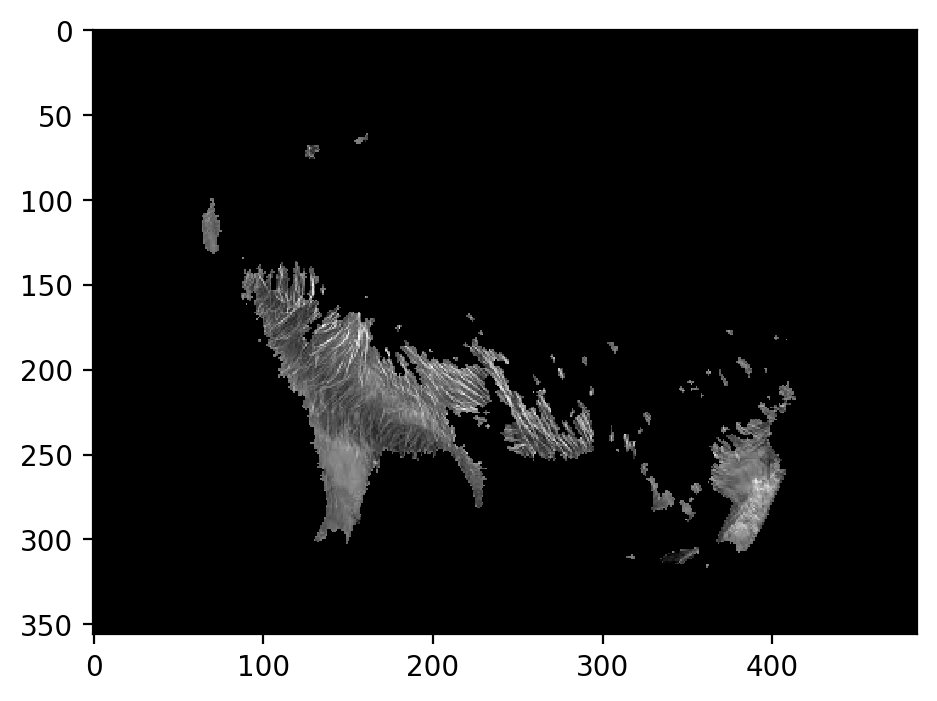

In [355]:
cleaned = img * ~background_mask
plt.imshow(cleaned)

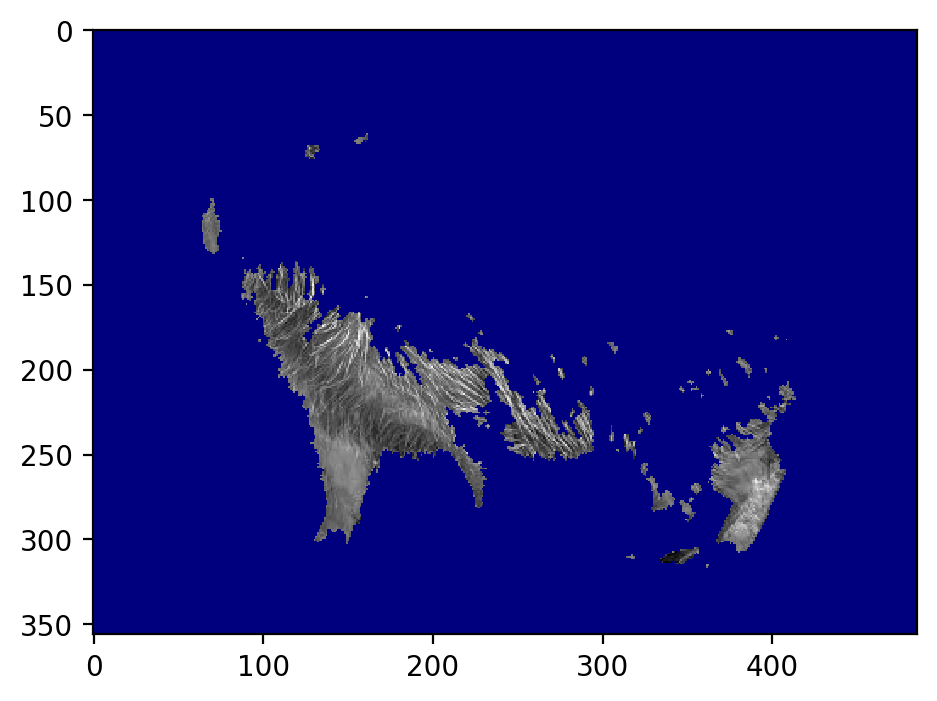

In [356]:
plt.imshow(cleaned, cmap='gray')
plt.imshow(background_mask.reshape(background_mask.shape + (1,)) * np.array([0, 0, 1, 0.5]))

In [357]:
seed_mask = np.zeros(img.shape, dtype=np.int)
seed_mask[0, 0] = 1 # background
seed_mask[w-1, h-1] = 2 # foreground

C:\Users\olypa\AppData\Local\Temp\ipykernel_748\3070024738.py:1: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  seed_mask = np.zeros(img.shape, dtype=np.int)


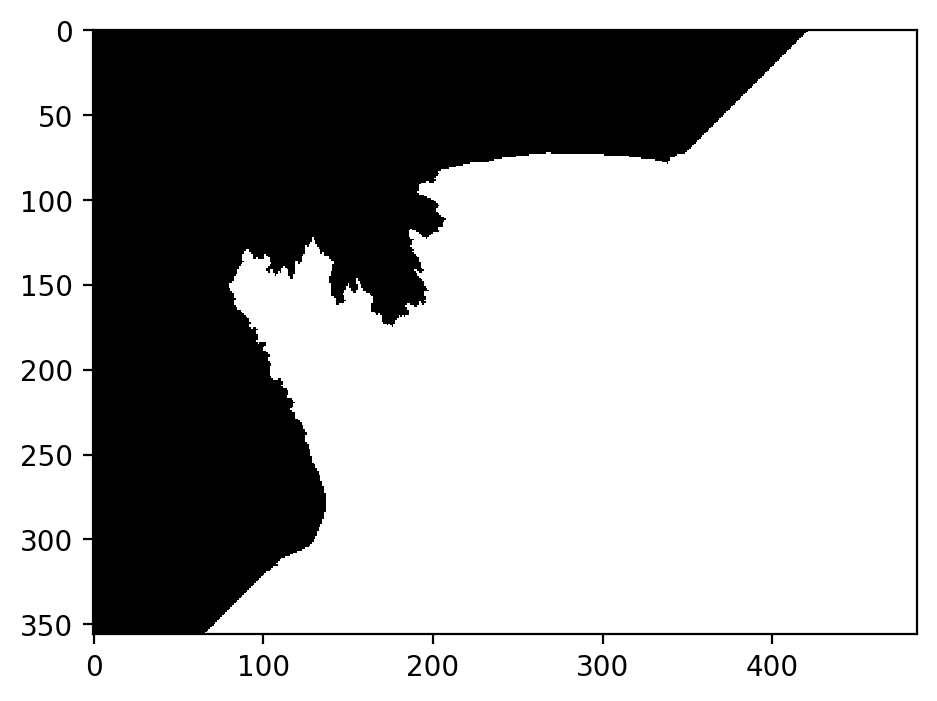

In [358]:
ws = watershed(blurred, seed_mask)
plt.imshow(ws)

In [359]:
def draw_group_as_background(ax, group, watershed_result, original_image):
    "Draws a group from the watershed result as red background."
    background_mask = (watershed_result == group)
    cleaned = original_image * ~background_mask
    ax.imshow(cleaned, cmap='gray')
    ax.imshow(background_mask.reshape(background_mask.shape + (1,)) * np.array([0, 0, 1, 0.5]))

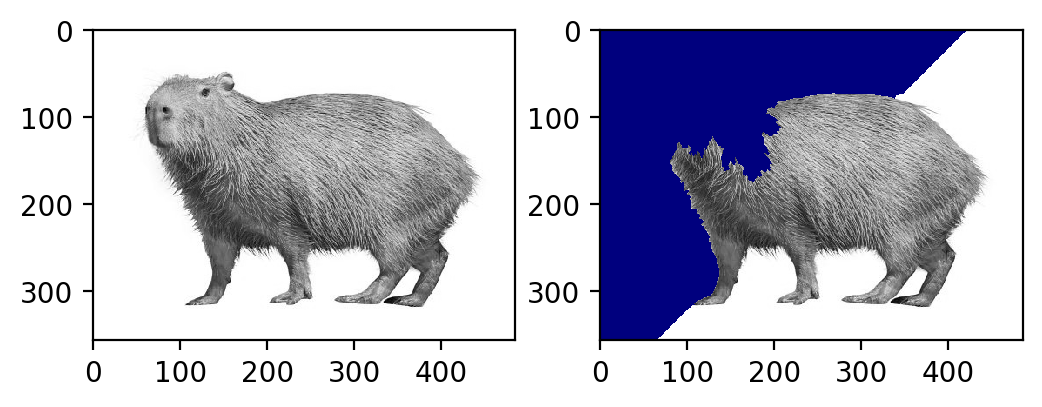

In [360]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(img)
draw_group_as_background(ax[1], 1, ws, img)